In [1]:
## for data
import pandas as pd
import collections
import json

In [6]:
lst_dics = []
with open("C:/Users\VASAN/Downloads/archive (3)/News_Category_Dataset_v2.json", mode='r', errors='ignore') as News_Category_Dataset_v2_file:
    for dic in News_Category_Dataset_v2_file:
        lst_dics.append( json.loads(dic) )
## print the first one      
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [7]:
## create dtf
dtf = pd.DataFrame(lst_dics)
## filter categories
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]
## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
## print 5 random rows
dtf.sample(5)

,y,text
60927,ENTERTAINMENT,Emily Blunt Just Can't Mind Her Own Business I...
54194,POLITICS,Obama Again Extends Troop Presence In Afghanistan
102322,POLITICS,"Obama Poll Watch -- December, 2014"
8869,POLITICS,The Daughter Of An Ex-Coal Executive Helped Le...
138523,TECH,Cell Phone Calls On Airplanes May Be Outrageou...


In [8]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

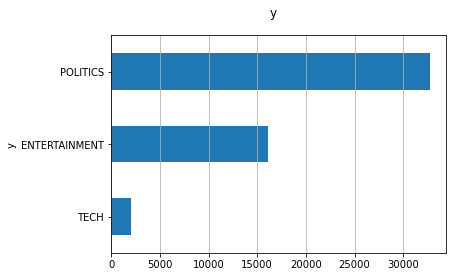

In [9]:
x = "y"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [10]:
## for language detection
import langdetect

In [11]:
txt = dtf["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


In [12]:
                                 dtf['lang'] = dtf["text"].apply(lambda x: langdetect.detect(x) if 
x.strip() != "" else "")
dtf.head()

,y,text,lang
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en


In [13]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50879 entries, 1 to 200848
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       50879 non-null  object
 1   text    50879 non-null  object
 2   lang    50879 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [14]:
dtf.describe()

,y,text,lang
count,50879,50879,50879
unique,3,50679,32
top,POLITICS,Sunday Roundup,en
freq,32739,90,48969


In [15]:
dtf.tail()

,y,text,lang
200844,TECH,Google+ Now Open for Teens With Some Safeguards,en
200845,TECH,Web Wars,so
200846,TECH,"First White House Chief Technology Officer, An...",en
200847,TECH,Watch The Top 9 YouTube Videos Of The Week,en
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,en


In [16]:
dtf = dtf[dtf["lang"]=="en"]

In [18]:
print("--- original ---")
print(txt)
print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)
print("--- tokenization ---")
txt = txt.split()
print(txt)

--- original ---
Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song
--- cleaning ---
will smith joins diplo and nicky jam for the 2018 world cups official song
--- tokenization ---
['will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', '2018', 'world', 'cups', 'official', 'song']


In [17]:
## for text processing
import re
import nltk

In [19]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VASAN\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VASAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VASAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
print("--- original ---")
print(txt)
print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)
print("--- tokenization ---")
txt = txt.split()
print(txt)

--- original ---
['will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', '2018', 'world', 'cups', 'official', 'song']
--- cleaning ---
will smith joins diplo and nicky jam for the 2018 world cups official song
--- tokenization ---
['will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', '2018', 'world', 'cups', 'official', 'song']


In [23]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

--- remove stopwords ---
['smith', 'joins', 'diplo', 'nicky', 'jam', '2018', 'world', 'cups', 'official', 'song']


In [37]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['smith', 'join', 'diplo', 'nicki', 'jam', '2018', 'world', 'cup', 'offici', 'song']
--- lemmatisation ---
['smith', 'join', 'diplo', 'nicky', 'jam', '2018', 'world', 'cup', 'official', 'song']
